# framingham dataset


In [2]:
# import libraries and dataset

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True,style='darkgrid')

In [3]:
df = pd.read_excel('F:\Skillenable\Data frames\Framingham.xlsx')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
male,4235.0,0.429752,0.495099,0.00,0.00,0.0,1.00,1.0
age,4235.0,49.583707,8.574840,32.00,42.00,49.0,56.00,70.0
education,4131.0,1.979666,1.019934,1.00,1.00,2.0,3.00,4.0
currentSmoker,4235.0,0.493743,0.500020,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4206.0,9.005468,11.926817,0.00,0.00,0.0,20.00,70.0
BPMeds,4183.0,0.029644,0.169623,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4235.0,0.005903,0.076614,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4235.0,0.310508,0.462756,0.00,0.00,0.0,1.00,1.0
diabetes,4235.0,0.025738,0.158371,0.00,0.00,0.0,0.00,1.0
totChol,4185.0,236.709916,44.605370,107.00,206.00,234.0,263.00,696.0


In [5]:
df.isnull().sum()

male                 0
age                  0
education          104
currentSmoker        0
cigsPerDay          29
BPMeds              52
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            382
TenYearCHD           0
dtype: int64

In [6]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
# the dataset contain aroun 13% null values, we are not going to drop, Let's impute missing values.
from sklearn.impute import KNNImputer

In [8]:
knn = KNNImputer(n_neighbors=1)

In [9]:
missing_cols = df[['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']]

In [10]:
missing = np.array(missing_cols)

In [11]:
imputed_cols = knn.fit_transform(missing)

In [12]:
imputed_cols = pd.DataFrame(imputed_cols,columns=['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose'])

In [13]:
imputed_cols.head()

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose
0,4.0,0.0,0.0,195.0,26.97,80.0,77.0
1,2.0,0.0,0.0,250.0,28.73,95.0,76.0
2,1.0,20.0,0.0,245.0,25.34,75.0,70.0
3,3.0,30.0,0.0,225.0,28.58,65.0,103.0
4,3.0,23.0,0.0,285.0,23.10,85.0,85.0


In [14]:
df = df.drop(['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose'],axis=1)
df.head()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD
0,1,39,0,0,0,0,106.0,70.0,0
1,0,46,0,0,0,0,121.0,81.0,0
2,1,48,1,0,0,0,127.5,80.0,0
3,0,61,1,0,1,0,150.0,95.0,1
4,0,46,1,0,0,0,130.0,84.0,0


In [15]:
df = pd.concat([df,imputed_cols],axis=1)
df.head()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose
0,1,39,0,0,0,0,106.0,70.0,0,4.0,0.0,0.0,195.0,26.97,80.0,77.0
1,0,46,0,0,0,0,121.0,81.0,0,2.0,0.0,0.0,250.0,28.73,95.0,76.0
2,1,48,1,0,0,0,127.5,80.0,0,1.0,20.0,0.0,245.0,25.34,75.0,70.0
3,0,61,1,0,1,0,150.0,95.0,1,3.0,30.0,0.0,225.0,28.58,65.0,103.0
4,0,46,1,0,0,0,130.0,84.0,0,3.0,23.0,0.0,285.0,23.10,85.0,85.0


In [16]:
df.columns


Index(['male', 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'sysBP', 'diaBP', 'TenYearCHD', 'education', 'cigsPerDay',
       'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [17]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
prevalentStroke    0
prevalentHyp       0
diabetes           0
sysBP              0
diaBP              0
TenYearCHD         0
education          0
cigsPerDay         0
BPMeds             0
totChol            0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [18]:
df['TenYearCHD'].value_counts()

0    3591
1     644
Name: TenYearCHD, dtype: int64

C:\Users\arun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

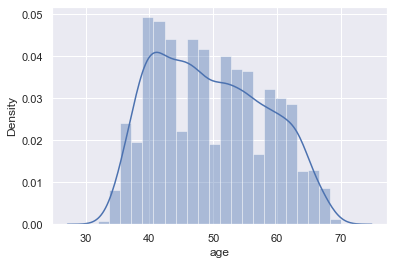

In [19]:
# ploting the data for age
sns.distplot(df['age'])


- Dataset is heavily distributed.



C:\Users\arun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

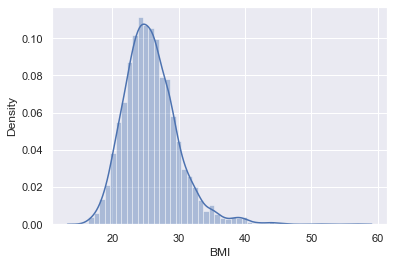

In [20]:
# ploting the data for BMI
sns.distplot(df['BMI'])

C:\Users\arun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heartRate', ylabel='Density'>

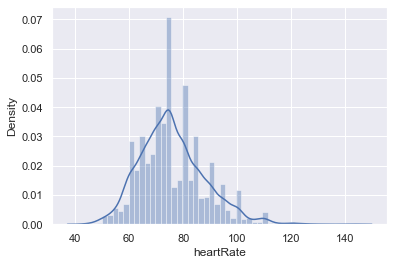

In [21]:
# ploting the data for heartRate

sns.distplot(df['heartRate'])



C:\Users\arun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='glucose', ylabel='Density'>

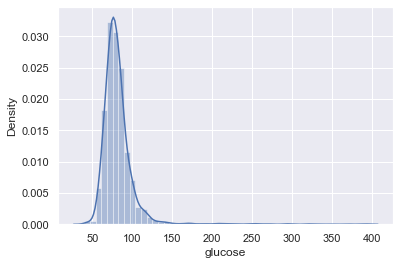

In [22]:
# ploting the data for gluose

sns.distplot(df['glucose'])


C:\Users\arun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totChol', ylabel='Density'>

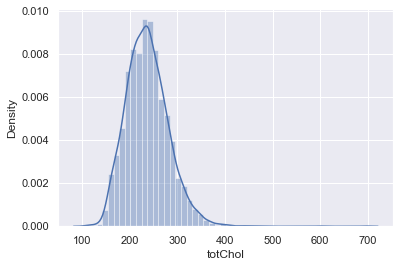

In [23]:
# Plotting the data for cholestrol
sns.distplot(df['totChol'])


C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

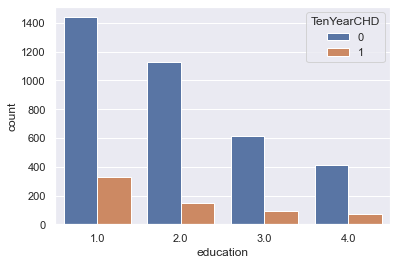

In [24]:
sns.countplot(df['education'],hue=df['TenYearCHD'])

In [25]:
df.education.value_counts()

1.0    1771
2.0    1278
3.0     704
4.0     482
Name: education, dtype: int64

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

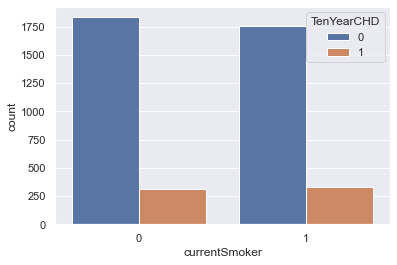

In [26]:
sns.countplot(df['currentSmoker'],hue=df['TenYearCHD'])

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

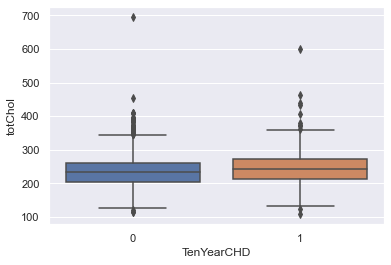

In [27]:
sns.boxplot(df['TenYearCHD'],df['totChol'])

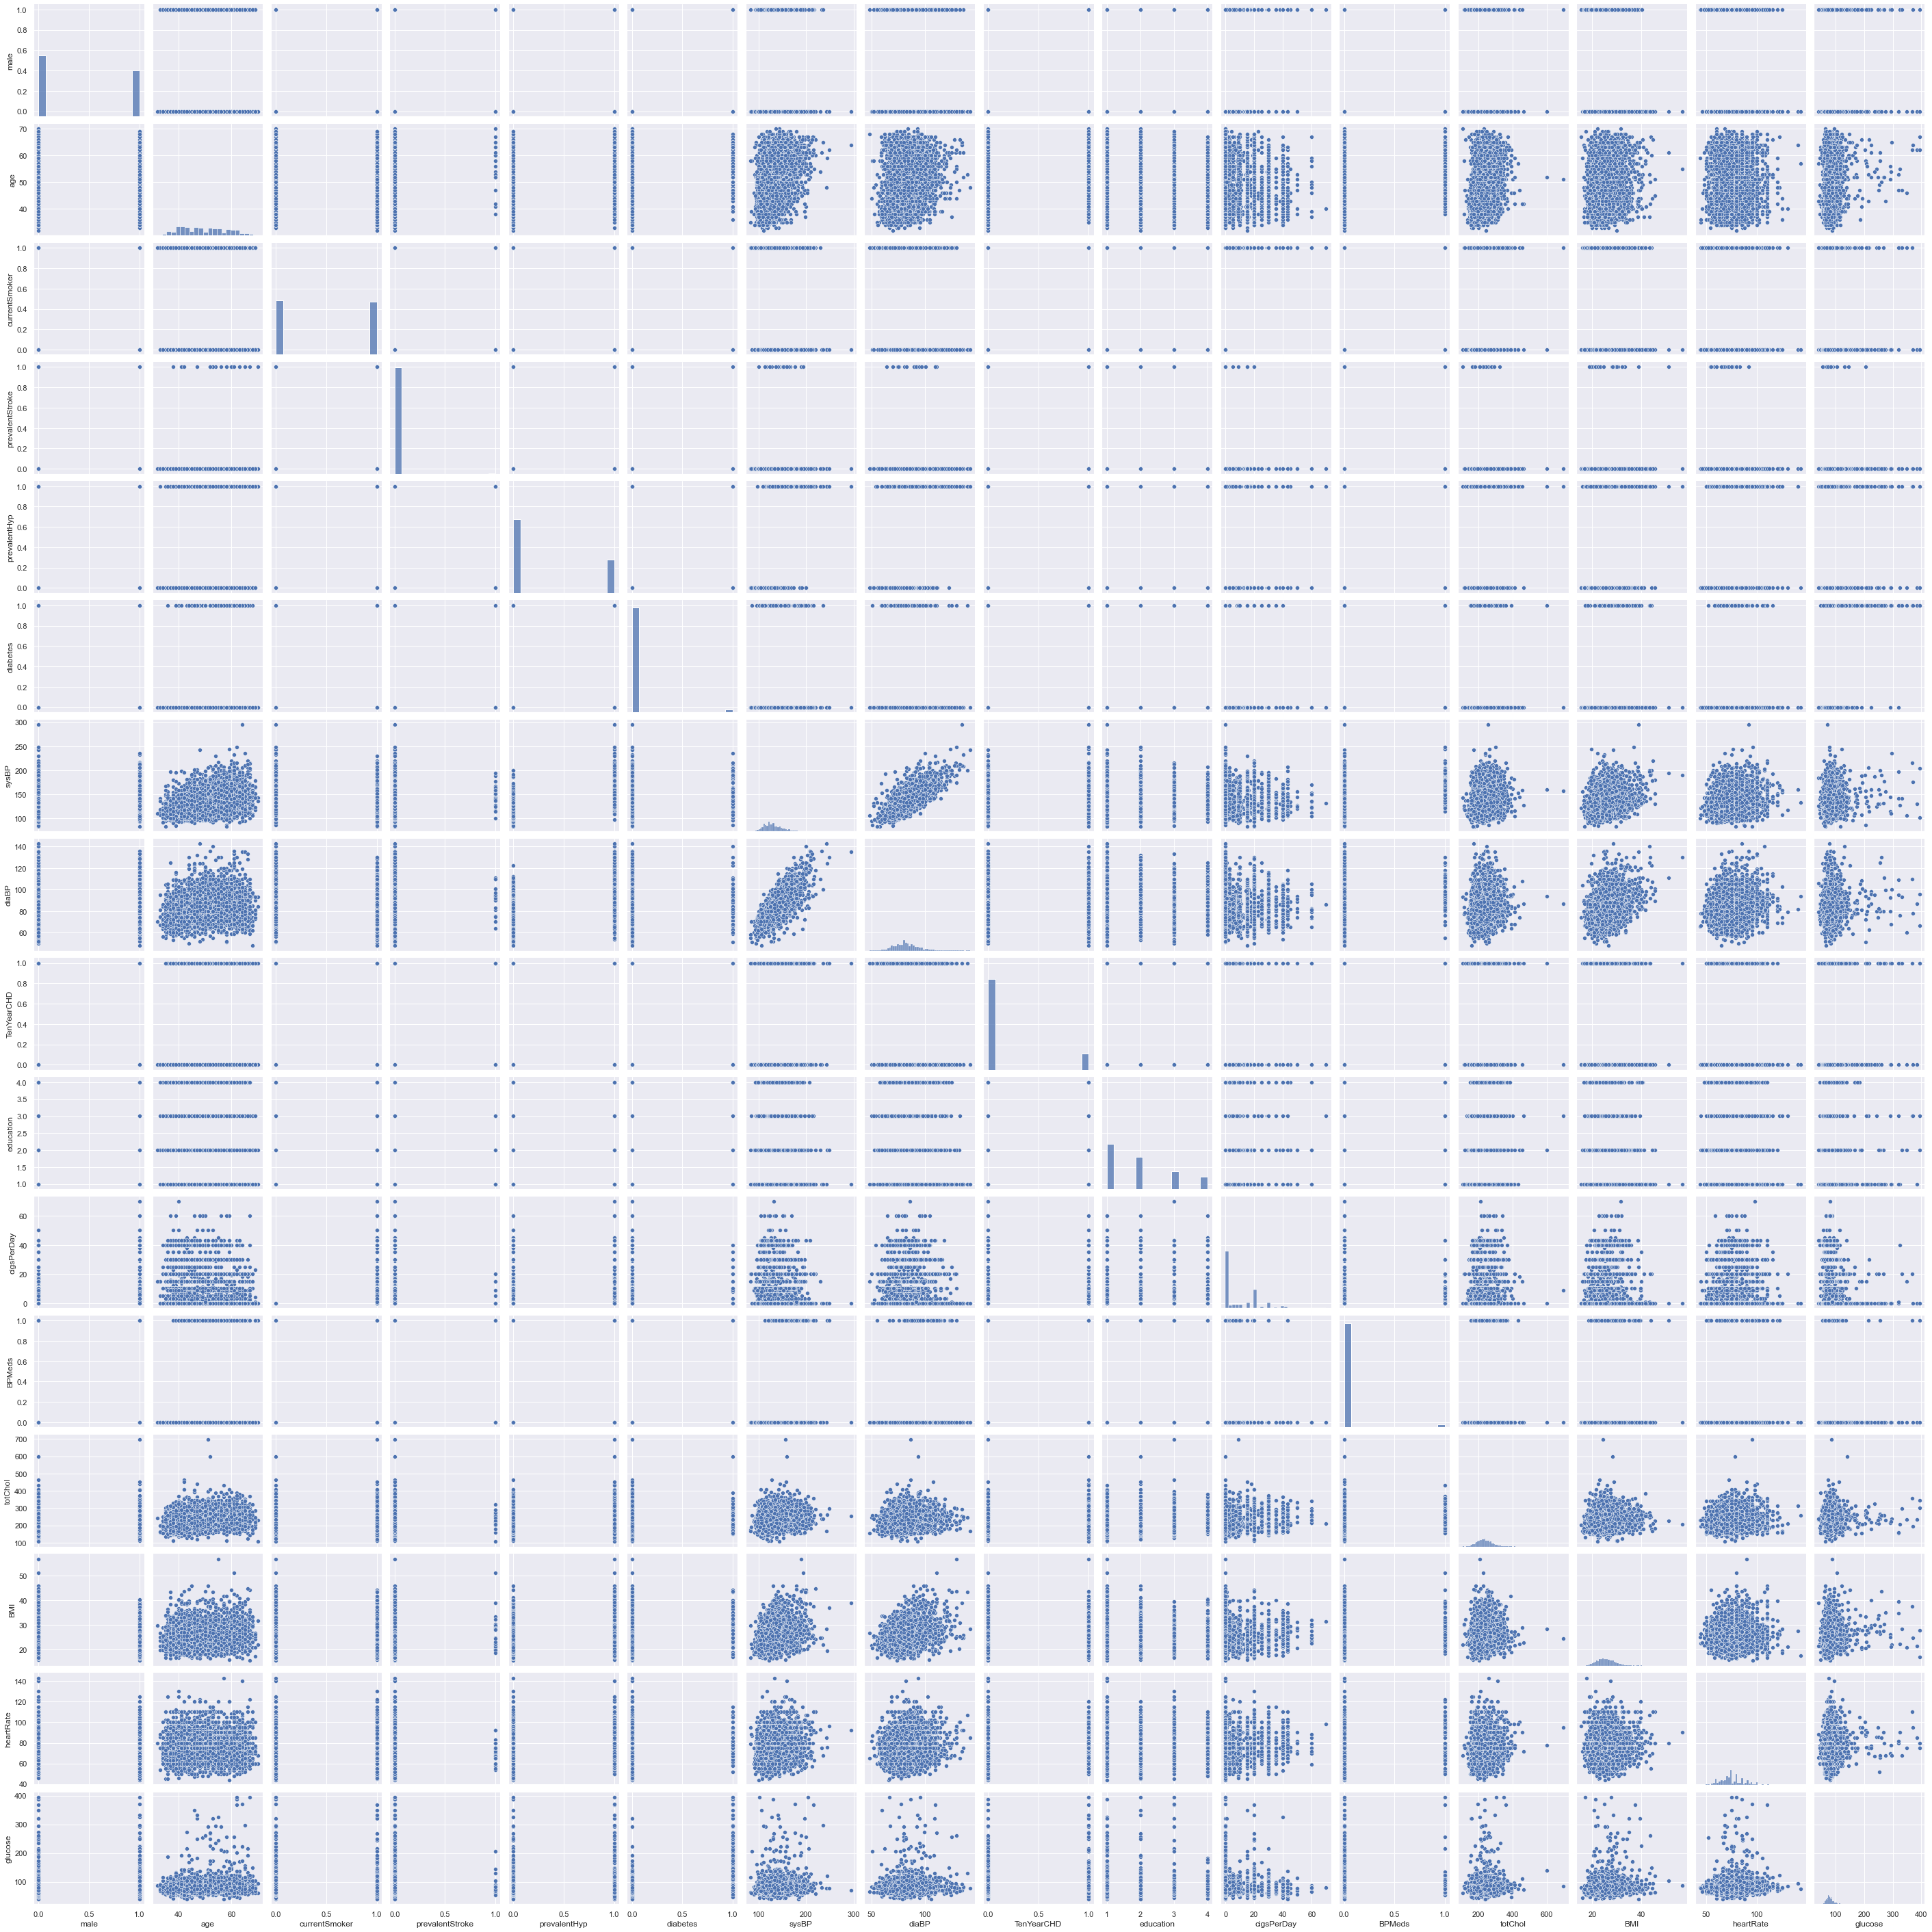

In [28]:
sns.pairplot(df)

<AxesSubplot:>

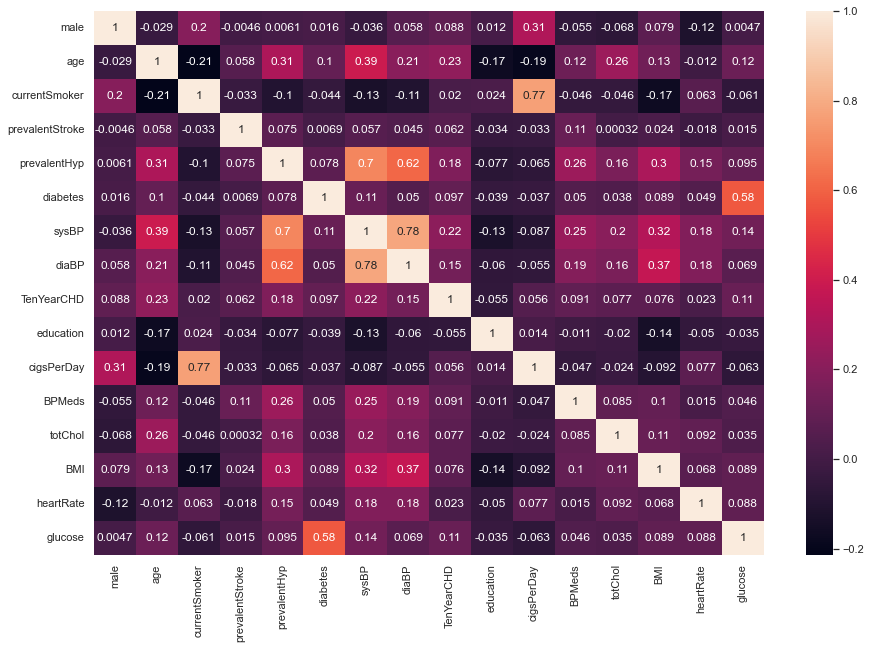

In [29]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot =True )


In [39]:
# define input and output

X = df.drop(['TenYearCHD'],axis=1)
Y = df['TenYearCHD']

In [47]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


In [48]:
os = RandomOverSampler(0.5)

C:\Users\arun\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [49]:
import os

In [50]:
x_os,y_os = os.fit_Sample(X,Y)

AttributeError: module 'os' has no attribute 'fit_Sample'

In [1]:
!pip install imbalanced-Learn